# Greedy Clique Expansion Community Finder (GCE) # 
подберём такие параметры, которые бы давали максимальное значение nmi

In [4]:
import numpy as np
import random
random.seed = 108
from tqdm import tqdm_notebook as tqdm
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
import pandas as pd
%matplotlib inline

In [5]:
!pwd

/home/latna/aponom/clustering/Scripts


In [78]:
def generate_params(params):
    keys = list(params.keys())
    if len(keys) == 1:
        for value in params[keys[0]]:
            yield ( keys[0] + " " + str(value) )        
    if len( keys ) > 1:
        for value in params[keys[0]]:
            for remain_params in generate_params({k:params[k] for k in keys[1:]}):
                yield ( keys[0] + " " + str(value) + " " + remain_params )

In [162]:
def GCE_experiment(inputFile, groundTruth, params = {}, vertexNumerationShift=0, verbose=False):
    datasetName = inputFile.split('/')[-2]
    workingDir = "../Results/GCE_{}".format(datasetName)
    outputFile = workingDir + "/GCE_output.txt"
    
    !mkdir {workingDir}
    
    all_results = {}
    bestParam = "not found"
    nmi_best = 0;
    for param in tqdm(list(generate_params(params))):
        out = !../related_methods/GCECommunityFinder/build/GCECommunityFinder {inputFile} 4 0.9 {param} .75
        if verbose:
            print(out)
        with open(outputFile, 'w') as the_file:
            for line in out[out.index('Finished')+1:]:
                the_file.write(" ".join([str(int(a)+vertexNumerationShift) for a in line.split()]) + "\n")

        output=!../Overlapping-NMI/onmi {groundTruth} {outputFile}
        nmi=float(output[0].split()[1])
        all_results[param] = nmi
        if nmi >  nmi_best:
            bestParam = param
            nmi_best = nmi
    print("Best ONMI: {} params: '{}'".format(nmi_best, bestParam) )                   
    return all_results

In [150]:
def plot_graph_for_all_results(all_results, datasetName):
    xdata=[]
    ydata=[]
    df = pd.DataFrame()
    for param, nmi in all_results.items():
        splited = param.split()
        xdata.append(param)
        ydata.append(nmi)
        df = df.append({'x': float(param), 'y': nmi}, ignore_index=True)

    plt.plot(xdata, ydata, 'C3', zorder=1, lw=3)
    plt.scatter(xdata, ydata,s=70,zorder=2)
    plt.xlabel('fitnessExponentAlpha')
    plt.ylabel('onmi value');
    plt.title('Algorithm: "GCE"\nDataset: {}'.format(datasetName));
    plt.show()

# School_Friendship #

In [164]:
params={}
params[""] = np.arange(0.05, 0.95, 0.05)

inputFile = "../datasets/school_friendship/school-2.dat"
groundTruth = "../datasets/school_friendship/truth-school.dat"
all_results = GCE_experiment(inputFile, groundTruth, params, vertexNumerationShift=-1)

mkdir: cannot create directory ‘GCE_school_friendship’: File exists



Best ONMI: 0.745248 params: ' 0.9000000000000001'


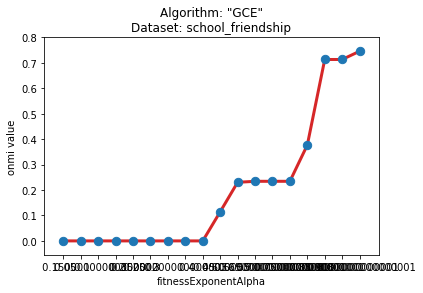

In [165]:
plot_graph_for_all_results(all_results, "school_friendship")

# Karate Club#

In [167]:
inputFile = "../datasets/karate/karate.dat"
groundTruth = "../datasets/karate/truth_karate.dat"
all_results = GCE_experiment(inputFile, groundTruth, params, vertexNumerationShift=0)

mkdir: cannot create directory ‘GCE_karate’: File exists



Best ONMI: 0.685455 params: ' 0.8'


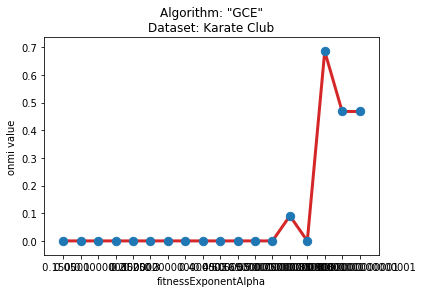

In [168]:
plot_graph_for_all_results(all_results, "Karate Club")

# Adjnoun#

In [169]:
inputFile = "../datasets/adjnoun/adjnoun.dat"
groundTruth = "../datasets/adjnoun/truth_adjnoun.dat"
all_results = GCE_experiment(inputFile, groundTruth, params, vertexNumerationShift=-1)

mkdir: cannot create directory ‘GCE_adjnoun’: File exists



Best ONMI: 0.00463105 params: ' 0.05'


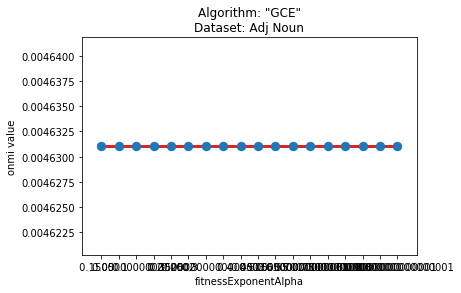

In [170]:
plot_graph_for_all_results(all_results, "Adj Noun")

# Football Club #

In [171]:
inputFile = "../datasets/football/footballTSEinput_original.dat"
groundTruth = "../datasets/football/truth_footballTSEinput.dat"
all_results = GCE_experiment(inputFile, groundTruth, params, vertexNumerationShift=-1)

mkdir: cannot create directory ‘GCE_football’: File exists



Best ONMI: 0.880363 params: ' 0.8500000000000001'


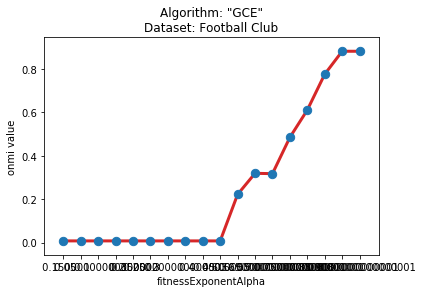

In [172]:
plot_graph_for_all_results(all_results, "Football Club")

# Politics Book #

In [173]:
inputFile = "../datasets/polbooks/polbooks.dat"
groundTruth = "../datasets/polbooks/truth_polbooks.dat"
all_results = GCE_experiment(inputFile, groundTruth, params, vertexNumerationShift=0)

mkdir: cannot create directory ‘GCE_polbooks’: File exists



Best ONMI: 0.398558 params: ' 0.8500000000000001'


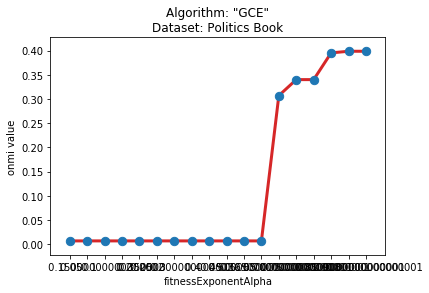

In [174]:
plot_graph_for_all_results(all_results, "Politics Book")

## TODO do tests on benchmarking files ##